This is for the data after their trial to check if who has more positive tweets.

In [1]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained("lxyuan/distilbert-base-multilingual-cased-sentiments-student")
model = AutoModelForSequenceClassification.from_pretrained("lxyuan/distilbert-base-multilingual-cased-sentiments-student")

In [2]:
import pandas as pd
import numpy as np

In [3]:
df_after = pd.read_csv('twitter-win-sentiment-depp-amber.csv')
df_after

,created_at,username,tweet,language
0,2022-08-17 09:31:52 UTC,carracontinues,@Kool_Aid_Free @enews This too 🫢 Amber Heard...,en
1,2022-08-17 09:30:00 UTC,elcxillo,"@jozomi @suziiieee21 Et inversement, comme joh...",fr
2,2022-08-17 09:29:00 UTC,femcondition,Amber Heard 'felt' abused bc Johnny Depp didn'...,en
3,2022-08-17 09:26:21 UTC,govastiletogr,Η πολύκροτή δίκη του Johnny Depp εναντίον της ...,el
4,2022-08-17 09:24:56 UTC,efialtiso,Η πολύκροτη δίκη του Johnny Depp και της Amber...,el
...,...,...,...,...
6087,2022-08-07 20:08:45 UTC,harry_hparsons,@INarteMURAT the defamation laws have been str...,en
6088,2022-08-07 20:08:16 UTC,danielfactor13,The majority of abuse on social media sites li...,en
6089,2022-08-07 20:03:12 UTC,murraylver,I don’t like amber heard but I don’t like John...,en
6090,2022-08-07 19:57:52 UTC,donshelbyuk,https://t.co/gO8mww6v1M 'Law &amp; Order: SVU...,en


In [6]:
df_after['language'].value_counts()

language
en     5056
es      575
pt      165
fr      124
de       40
tr       34
it       28
in       11
da        9
el        7
vi        6
et        5
ro        4
und       4
ta        3
is        3
zh        3
ca        3
nl        2
pl        2
th        2
ja        2
ht        1
cs        1
sv        1
hi        1
Name: count, dtype: int64

In [4]:
# Function to predict sentiment for each tweet
def predict_sentiment(tweet):
    tokens = tokenizer.encode(tweet, return_tensors='pt', max_length=512, truncation=True)
    result = model(tokens)
    predicted_class = result.logits.argmax().item()
    # Map predicted class to sentiment label
    if predicted_class == 0:
        return 'Negative'
    elif predicted_class == 1:
        return 'Neutral'
    elif predicted_class == 2:
        return 'Positive'
    else:
        return 'Unknown'

# Apply sentiment prediction to each tweet
df_after['sentiment'] = df_after['tweet'].apply(predict_sentiment)
df_after

,created_at,username,tweet,language,sentiment
0,2022-08-17 09:31:52 UTC,carracontinues,@Kool_Aid_Free @enews This too 🫢 Amber Heard...,en,Negative
1,2022-08-17 09:30:00 UTC,elcxillo,"@jozomi @suziiieee21 Et inversement, comme joh...",fr,Positive
2,2022-08-17 09:29:00 UTC,femcondition,Amber Heard 'felt' abused bc Johnny Depp didn'...,en,Positive
3,2022-08-17 09:26:21 UTC,govastiletogr,Η πολύκροτή δίκη του Johnny Depp εναντίον της ...,el,Positive
4,2022-08-17 09:24:56 UTC,efialtiso,Η πολύκροτη δίκη του Johnny Depp και της Amber...,el,Positive
...,...,...,...,...,...
6087,2022-08-07 20:08:45 UTC,harry_hparsons,@INarteMURAT the defamation laws have been str...,en,Positive
6088,2022-08-07 20:08:16 UTC,danielfactor13,The majority of abuse on social media sites li...,en,Positive
6089,2022-08-07 20:03:12 UTC,murraylver,I don’t like amber heard but I don’t like John...,en,Positive
6090,2022-08-07 19:57:52 UTC,donshelbyuk,https://t.co/gO8mww6v1M 'Law &amp; Order: SVU...,en,Negative


In [5]:
df_after['sentiment'].value_counts()

sentiment
Positive    3333
Negative    2635
Neutral      124
Name: count, dtype: int64

In [6]:
def mentions_target(tweet, target_keywords):
    tweet_lower = tweet.lower()
    for target_keyword in target_keywords:
        if target_keyword.lower() in tweet_lower:
            return True
    return False

# Define keywords for Amber Heard
amber_keywords = ['heard', 'amber', 'mera']

# Define keywords for Johnny Depp
depp_keywords = ['depp', 'john', 'johnny' 'jack sparrow']

# Apply the function to identify mentions of Amber Heard and Johnny Depp
df_after['mentions_amber'] = df_after['tweet'].apply(lambda x: mentions_target(x, amber_keywords))
df_after['mentions_depp'] = df_after['tweet'].apply(lambda x: mentions_target(x, depp_keywords))


In [7]:
df_after.groupby('mentions_amber')['sentiment'].value_counts()

mentions_amber  sentiment
False           Positive       21
                Negative       10
True            Positive     3312
                Negative     2625
                Neutral       124
Name: count, dtype: int64

In [8]:
df_after.groupby('mentions_depp')['sentiment'].value_counts()

mentions_depp  sentiment
False          Negative       17
               Neutral         6
True           Positive     3333
               Negative     2618
               Neutral       118
Name: count, dtype: int64

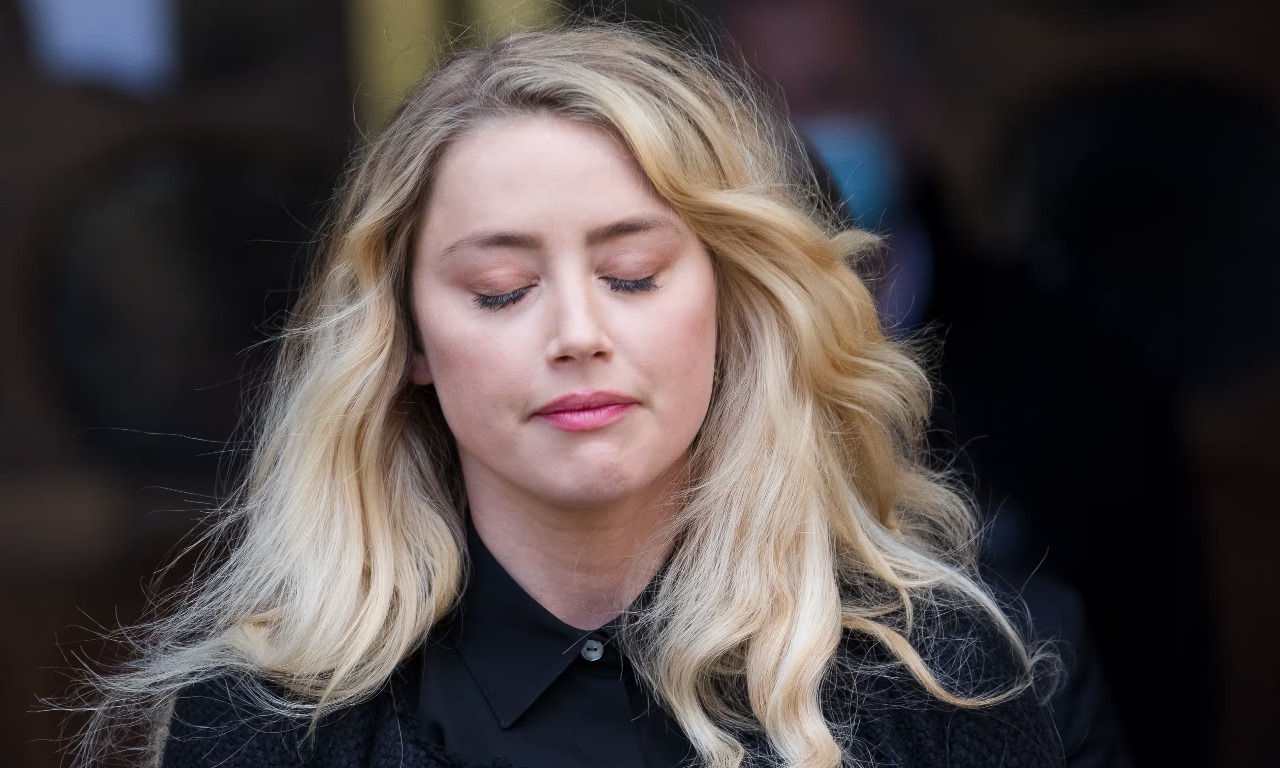

In [11]:
from textblob import TextBlob

def get_polarity_score(tweet):
    return TextBlob(tweet).sentiment.polarity

# Apply the function to get polarity score for each tweet
df_after['polarity_score'] = df_after['tweet'].apply(get_polarity_score)

# Calculate the total polarity score for mentions of Amber Heard and Johnny Depp
total_polarity_amber = df_after[df_after['mentions_amber']]['polarity_score'].sum()
total_polarity_depp = df_after[df_after['mentions_depp']]['polarity_score'].sum()

print("Total Polarity Score for Amber Heard:", total_polarity_amber)
print("Total Polarity Score for Johnny Depp:", total_polarity_depp)

Total Polarity Score for Amber Heard: 218.7279116934756
Total Polarity Score for Johnny Depp: 220.0879513760153


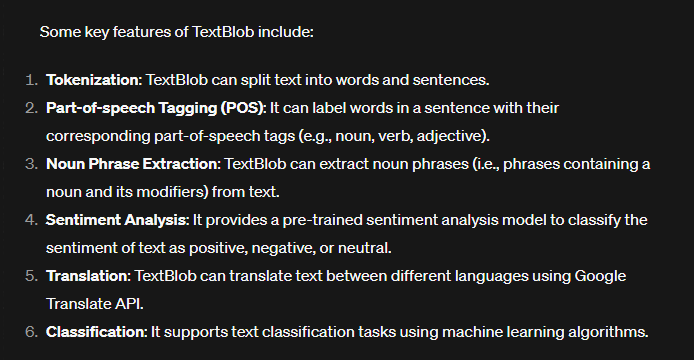

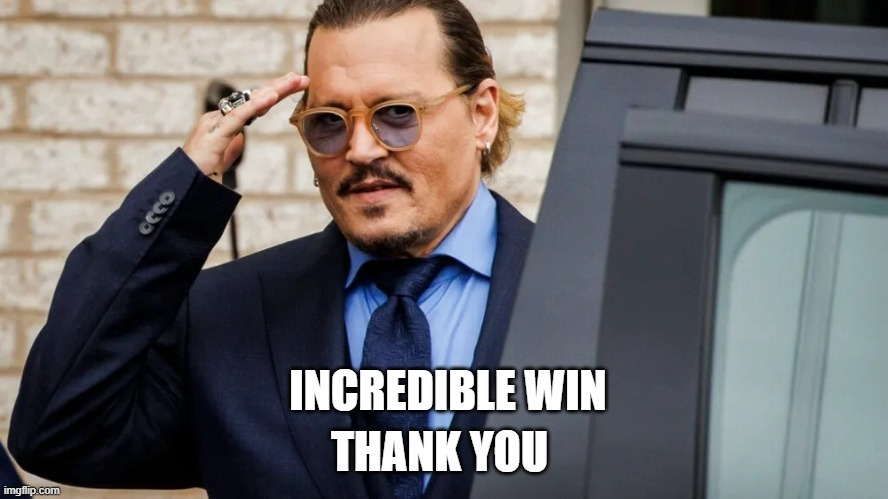